# text 분석

In [1]:
from konlpy.tag import Okt, Mecab,  Komoran, Kkma, Hannanum
import codecs
from bs4 import BeautifulSoup
from matplotlib import pyplot
from wordcloud import WordCloud


In [2]:
okt = Okt()
oktlist = okt.pos('아버지가방에들어가신다')
oktlist

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [3]:
kom = Komoran()
komlist = kom.pos('아버지가방에들어가신다')
komlist

[('아버지', 'NNG'),
 ('가방', 'NNP'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EC')]

In [4]:
han = Hannanum()
hanlist = han.pos('아버지가방에들어가신다')
hanlist

[('아버지가방에들어가', 'N'), ('이', 'J'), ('시ㄴ다', 'E')]

In [5]:
okt = Okt()
oktlist = okt.pos('이것도 되나욬ㅋㅋ', norm=True, stem=True)
oktlist

[('이', 'Determiner'),
 ('것', 'Noun'),
 ('도', 'Josa'),
 ('되다', 'Verb'),
 ('ㅋㅋ', 'KoreanParticle')]

In [7]:
okt = Mecab()
oktlist = okt.pos('아버지가방에들어가신다')
oktlist

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('신다', 'EP+EC')]

### 국립국어원 말뭉치 분석

In [40]:
fp = codecs.open('/Users/lesson6_mac/AtomData/python/words/diet/7CM00045.txt', "r", encoding='utf-16')
soup = BeautifulSoup(fp, "html.parser")
soup

<!DOCTYPE tei.2 SYSTEM "c:\sgml\dtd\tei2.dtd" [
	<!ENTITY % TEI.corpus "INCLUDE">

<!--ENTITY % TEI.extensions.ent SYSTEM "sejong1.ent"-->
<!--ENTITY % TEI.extensions.dtd SYSTEM "sejong1.dtd"-->
]&gt;

<tei.2>
<teiheader>
<filedesc>
<titlestmt>
<title>진료대화_식이요법, 전자전사자료</title>
<author>대화자</author>
<sponsor>대한민국 문화관광부</sponsor>
<respstmt>
<resp>전자/표준화</resp>
<tname>연세대학교 언어정보연구원</tname>
</respstmt>
</titlestmt>
<extent>2,530 어절(형태소 분석 파일 기준)</extent>
<publicationstmt>
<distributor>국립국어원</distributor>
<idno>7CM00045.hwp</idno>
<availability>배포 불가</availability>
</publicationstmt>
<sourcedesc>원전 없음, 진료 대화를 녹음하여 전사함</sourcedesc>
</filedesc>
<encodingdesc>
<projectdesc>21세기 세종계획 3단계 1차년도 말뭉치 구축</projectdesc>
<samplingdecl>녹음하여 전사</samplingdecl>
<editorialdecl>21세기 세종계획 구어 말뭉치 전사 및 마크업 지침에 따름</editorialdecl>
</encodingdesc>
<profiledesc>
<creation>
<date>2004</date>
</creation>
<langusage>
<language id="KO" usage="99">한국어, 표준어</language>
</langusage>
<particdesc>
<person age="40s" id="P1" se

In [43]:
# body = soup.select_one("text")
text = soup.getText()

In [56]:
okt = Okt()
word_dic = {}
lines = text.split("\r\n")
for line in lines:
    malist = okt.pos(line)
    for word in malist:
        if word[1] == 'Noun':
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1
keys = sorted(word_dic.items(), key = lambda x: x[1], reverse=True)
keys
        

[('거', 56),
 ('그', 51),
 ('이', 48),
 ('안', 32),
 ('인슐린', 27),
 ('때', 24),
 ('정도', 21),
 ('혈당', 21),
 ('흡수', 20),
 ('예', 20),
 ('음식', 19),
 ('해', 19),
 ('칼로리', 18),
 ('뭐', 18),
 ('번', 18),
 ('인제', 17),
 ('분비', 15),
 ('더', 15),
 ('식사', 15),
 ('지금', 14),
 ('담', 14),
 ('내', 13),
 ('게', 13),
 ('걸', 13),
 ('때문', 12),
 ('다이어트', 12),
 ('저장', 12),
 ('저희', 12),
 ('수', 12),
 ('또', 11),
 ('거기', 10),
 ('저녁', 10),
 ('개념', 10),
 ('그냥', 9),
 ('빵', 9),
 ('이야기', 8),
 ('그거', 8),
 ('혈압', 8),
 ('저', 8),
 ('네', 8),
 ('율', 8),
 ('체중', 8),
 ('녹음', 8),
 ('생각', 8),
 ('우리', 8),
 ('약', 8),
 ('음', 8),
 ('단계', 8),
 ('왜', 8),
 ('전혀', 7),
 ('치료', 7),
 ('인스턴트', 7),
 ('요', 7),
 ('다음', 7),
 ('그게', 7),
 ('소화', 7),
 ('날', 7),
 ('식품', 7),
 ('경우', 7),
 ('아침', 7),
 ('두', 7),
 ('가공', 7),
 ('전사', 6),
 ('분', 6),
 ('천이백', 6),
 ('거의', 6),
 ('프로', 6),
 ('설탕', 6),
 ('말', 6),
 ('사이즈', 6),
 ('규칙', 6),
 ('당뇨병', 6),
 ('막', 6),
 ('일', 6),
 ('현미', 6),
 ('제한', 6),
 ('생', 6),
 ('잡곡', 6),
 ('양', 5),
 ('적', 5),
 ('지방', 5),
 ('넣고옇', 5),
 ('입안

In [54]:
cloud_word = {}
for word, count in keys[:100]:
    if len(word) > 1 :
        print("{}({})".format(word, count), end = "")
        cloud_word[word] = count
wc = WordCloud(font_path='/Library/Fonts/AppleGothic.ttf', background_color='white', width=400, height=300)
cloud  = wc.fit_words(cloud_word)

인슐린(27)정도(21)혈당(21)흡수(20)음식(19)칼로리(18)인제(17)분비(15)식사(15)지금(14)때문(12)다이어트(12)저장(12)저희(12)거기(10)저녁(10)개념(10)그냥(9)이야기(8)그거(8)혈압(8)체중(8)녹음(8)생각(8)우리(8)단계(8)전혀(7)치료(7)인스턴트(7)다음(7)그게(7)소화(7)식품(7)경우(7)아침(7)가공(7)전사(6)천이백(6)거의(6)프로(6)설탕(6)사이즈(6)규칙(6)당뇨병(6)현미(6)제한(6)잡곡(6)지방(5)넣고옇(5)입안(5)백미(5)기준(5)상태(5)이상(5)요즘(5)정량(5)쪼금씩(5)천오백(5)절대(5)이론(4)계속(4)오십삼(4)여기(4)저녁식사(4)다른(4)보조(4)

(-0.5, 399.5, 299.5, -0.5)

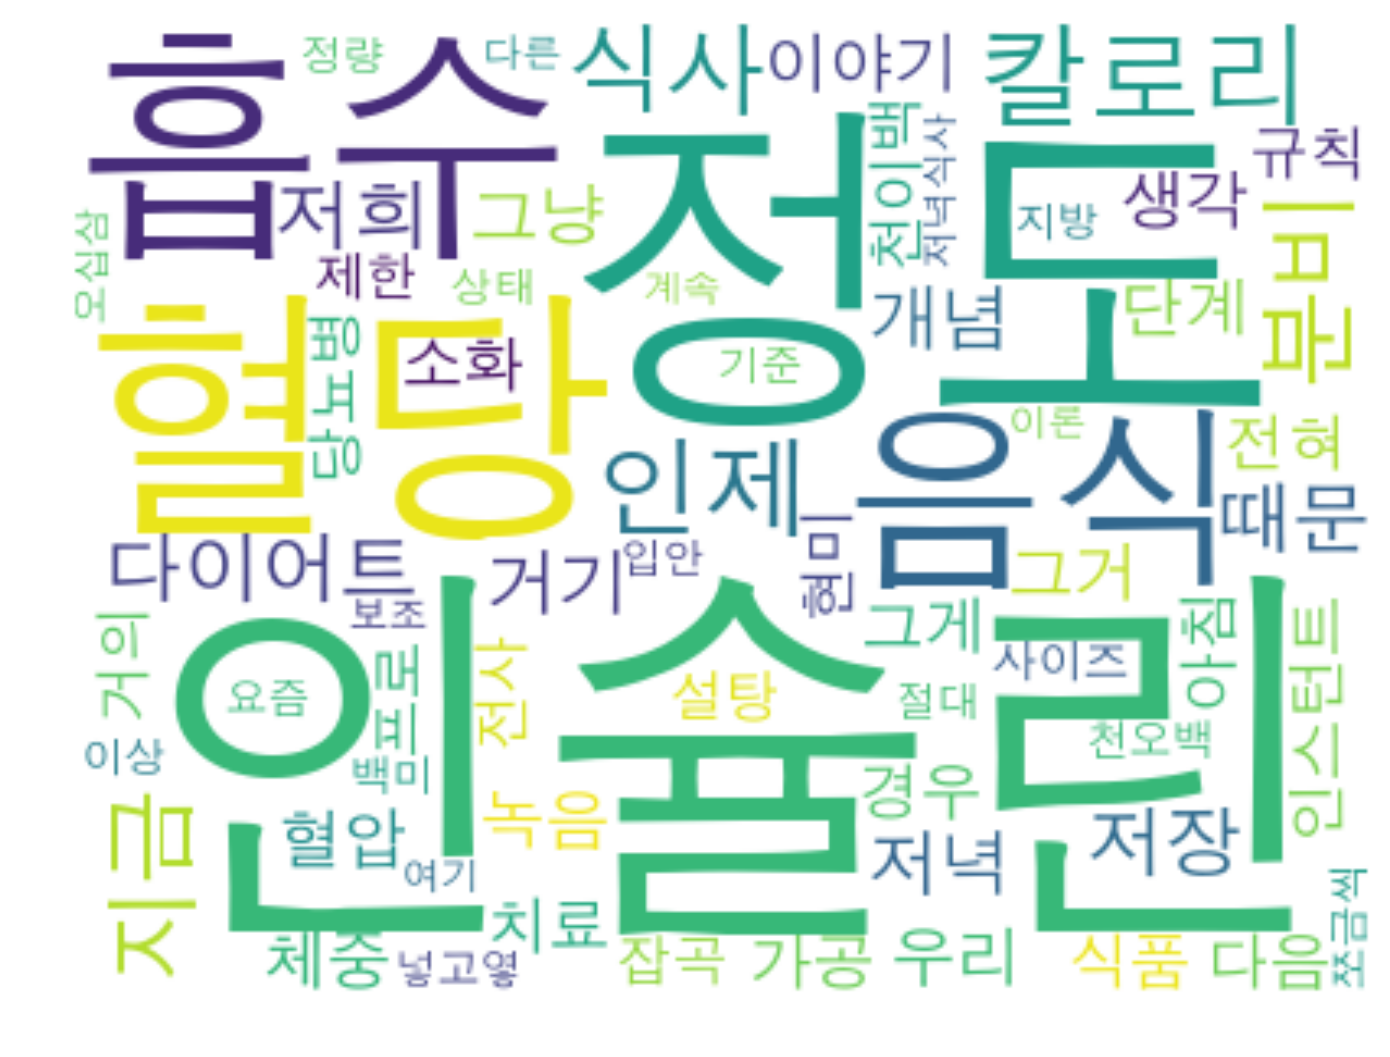

In [55]:
%matplotlib inline
pyplot.figure(figsize=(12,9))
pyplot.imshow(cloud, interpolation='bilinear')
pyplot.axis("off")

### Gensim (단어의 벡터 변환)

In [8]:
# import warnings
# warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
from gensim.models import word2vec

In [10]:
sen = [
    ['사랑', '아버지', '어머니', '여자', '남자'],
    ['사랑', '아버지', '어머니', '여자'],
    ['사랑', '어머니', '여자']
]
model = word2vec.Word2Vec(sen, size=100, window=3, min_count=1, workers=1)

In [11]:
model.most_similar(positive=['사랑','어머니'])

[('아버지', 0.16267281770706177),
 ('남자', 0.11980707943439484),
 ('여자', -0.005159769207239151)]

In [13]:
model.most_similar(positive=['아버지','여자'], negative=['남자'])

[('어머니', 0.11436007171869278), ('사랑', -0.08111269772052765)]

### 모델 만들기

In [31]:
fp = codecs.open('/Users/lesson6_mac/AtomData/python/words/diet/7CM00045.txt', 'r', encoding='utf=16')
soup = BeautifulSoup(fp, "html.parser")
text = soup.getText()

In [32]:
mec = Mecab()

In [33]:
results = []
lines = text.split("\r\n")
lines

['\n\n',
 ']>',
 '',
 '\n\n\n\n진료대화_식이요법, 전자전사자료\n대화자\n대한민국 문화관광부\n\n전자/표준화\n연세대학교 언어정보연구원\n\n\n2,530 어절(형태소 분석 파일 기준)\n\n국립국어원\n7CM00045.hwp\n배포 불가\n\n원전 없음, 진료 대화를 녹음하여 전사함\n\n\n21세기 세종계획 3단계 1차년도 말뭉치 구축\n녹음하여 전사\n21세기 세종계획 구어 말뭉치 전사 및 마크업 지침에 따름\n\n\n\n2004\n\n\n한국어, 표준어\n\n\n한의사, 경남\n회사원, 서울\n\n한의원에서 녹음함.\n\n구어 녹음 전사\n\n\n\n\n2004\n\n프로젝트책임자\n김향희\n\n음성 발화를 녹음(녹화)하여 PC로 입력\n\n\n2004-5\n\n보조원\n김윤희\n\n자료 녹음\n\n\n2004-7\n\n보조원\n국순경\n\n1차 전사\n\n\n2004-9\n\n연구보조원\n김수진\n\n2차 전사 후 띄어쓰기 오류 교정, 철자 오류 교정\n\n\n2004-10\n\n연구보조원\n김수진\n\n마크업, 태그 오류 수정, 세종 21 프로젝트 헤더 붙임, 마킹\n\n\n2010-03-20\n\nN/A\n이동주\n\n꼬꼬마 세종 말뭉치 활용 도구 적용을 위한 전체 파일 대상 태그 오류 일괄 수정\n\n\n\n\n\n',
 ']>',
 '\n\n지퍼닫는소리와잡음만1분30초동안들림\n예,\n저 있어서.\n고마워요.\n걱정 마세요.\n\n하시는 일이 어떤 일이십니까\n그냥,\n그냥 그냥,\n\n걱정하지 마시고 말씀하셔도 돼요.\n편집 편집되면서 또\n예.\n이상하게 나가\n\n\n말을,\n편집하기에 따라서 얼마든지,\n내용을 왜,\n바꿀 수도 있고,\n그런데,\n또,\n\n저 녹음하면은,\n근까,\n전혀,\n\n또 저로선 \n전혀, \n전혀:: 전혀 그런 게 이용되는 게 아니라,\n\n연구 목적이 되거든요 원장님.\n예.\n저희들이,\n예.\n인제,\n식사,\n그:: \n마무리 치료를 하잖아요,\n그죠?\n기존의 식이요법은,

In [34]:
a = mec.pos(lines[3])
a

[('진료', 'NNG'),
 ('대화', 'NNG'),
 ('_', 'SY'),
 ('식이', 'NNG'),
 ('요법', 'NNG'),
 (',', 'SC'),
 ('전자', 'NNG'),
 ('전사', 'NNG'),
 ('자료', 'NNG'),
 ('대화자', 'NNG'),
 ('대한민국', 'NNP'),
 ('문화관광부', 'NNP'),
 ('전자', 'NNG'),
 ('/', 'SC'),
 ('표준', 'NNG'),
 ('화', 'XSN'),
 ('연세', 'NNG'),
 ('대학교', 'NNG'),
 ('언어', 'NNG'),
 ('정보', 'NNG'),
 ('연구원', 'NNG'),
 ('2', 'SN'),
 (',', 'SC'),
 ('530', 'SN'),
 ('어절', 'NNG'),
 ('(', 'SSO'),
 ('형태소', 'NNG'),
 ('분석', 'NNG'),
 ('파일', 'NNG'),
 ('기준', 'NNG'),
 (')', 'SSC'),
 ('국립', 'NNG'),
 ('국어', 'NNG'),
 ('원', 'NNG'),
 ('7', 'SN'),
 ('CM', 'SL'),
 ('00045', 'SN'),
 ('.', 'SF'),
 ('hwp', 'SL'),
 ('배포', 'NNG'),
 ('불가', 'NNG'),
 ('원전', 'NNG'),
 ('없', 'VA'),
 ('음', 'ETN'),
 (',', 'SC'),
 ('진료', 'NNG'),
 ('대화', 'NNG'),
 ('를', 'JKO'),
 ('녹음', 'NNG'),
 ('하', 'XSV'),
 ('여', 'EC'),
 ('전사', 'NNG'),
 ('함', 'XSV+ETN'),
 ('21', 'SN'),
 ('세기', 'NNG'),
 ('세종', 'NNP'),
 ('계획', 'NNG'),
 ('3', 'SN'),
 ('단계', 'NNG'),
 ('1', 'SN'),
 ('차년', 'NNG'),
 ('도', 'JX'),
 ('말뭉치', 'NNG'),
 ('구축', 'NNG

In [35]:
for line in lines:
    malist = mec.pos(line)
    r = []
    for word in malist:
#         if not word[1] in ['SC','JKO', 'SL','SN','SSC','JKB','MAJ','XSV', 'EC', 'VA']:
        if word[1] in ['NNG', 'NNP']:
            r.append(word[0])
    rl = (" ".join(r)).strip()
    results.append(rl)
wakati_file = './words/diet/diet.wakati'

In [41]:
results

['',
 '',
 '',
 '진료 대화 식이 요법 전자 전사 자료 대화자 대한민국 문화관광부 전자 표준 연세 대학교 언어 정보 연구원 어절 형태소 분석 파일 기준 국립 국어 원 배포 불가 원전 진료 대화 녹음 전사 세기 세종 계획 단계 차년 말뭉치 구축 녹음 전사 세기 세종 계획 구어 말뭉치 전사 마크업 지침 한국어 표준어 의사 경남 회사원 서울 의원 녹음 구어 녹음 전사 프로젝트 책임자 김향희 음성 발화 녹음 녹화 입력 보조원 김윤희 자료 녹음 보조원 국 순경 전사 연구 보조원 김수진 전사 후 띄어쓰기 오류 교정 철자 오류 교정 연구 보조원 김수진 마크업 태그 오류 수정 세종 프로젝트 헤더 붙임 마킹 이동주 꼬꼬마 세종 말뭉치 활용 도구 적용 전체 파일 대상 태그 오류 일괄 수정',
 '',
 '지퍼 소리 잡음 초동 걱정 일 일 걱정 말씀 편집 편집 이상 말 편집 얼마 내용 녹음 이용 연구 목적 원장 식사 마무리 치료 기존 식이 요법 보통 기준 때 정도 평소 평소 가정 때 정도 단계 정도 생각 요정 정도 개념 담 이론 다음 단계 쪼금 최종 정도 생각 식사량 쪼금 최종 정도 식사 양 해당 경우 정도 때 저녁 식사 생식 야채 종류 저녁 아침 점심 일상 식사 개념 저녁 식사 정도 아침 아침 이상 사람 점심 정상 패턴 때 점심 정상 패턴 생각 저녁 개념 접근 담 약 짐 하루 담 담 약 평생 약 약 혼자 체중 관리 목표 담 체중 유지 아침 저녁 때 저녁 담 식사량 이상 개념 식사 날 모임 정도 식사 제한 약 상태 식사 정도 칼로리 때 저녁 철저 정도 정도 만약 나중 몸무게 조절 정도 선 운동량 식사 기본 다이어트 계획 한약 단계 한약 단계 지방 분해 침 경우 정도 식사 정도 최저 선 치료 양 개념 중요 저녁 식사 조절 다음 중요 이론 이야기 규칙 식사 습관 중요 담 저녁 식사 제한 생활 규칙 규칙 생활 규칙 식사 규칙 연결 규칙 생활 장 식사 규칙 체중 증가 원인 다음 때 설명 인슐린 다이어트 법 유행 인터넷 유행 다이어트 법 이론 식 혈당 혈당 일시 음식 혈당 인

In [36]:
with open(wakati_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
data = word2vec.LineSentence(wakati_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save("./words/diet/diet.model")

### 모델 분석

In [43]:
model = word2vec.Word2Vec.load("./words/diet/diet.model")
model.most_similar(positive=["저녁"])

[('치료', 0.9994562864303589),
 ('체중', 0.999417245388031),
 ('기준', 0.9993986487388611),
 ('접근', 0.9993914365768433),
 ('생식', 0.9993513822555542),
 ('나이', 0.9993358850479126),
 ('화식', 0.999326229095459),
 ('저울', 0.9993249177932739),
 ('상태', 0.9993143677711487),
 ('정도', 0.9993116855621338)]

In [44]:
fp = codecs.open('/Users/lesson6_mac/AtomData/python/words/kowiki-latest-abstract-1.txt', 'r', encoding='utf=16')

In [46]:
fp

In [47]:
soup = BeautifulSoup(fp, "html.parser")
soup